## ABC

In [1]:
import sys 
from pathlib import Path

# Define the path to the src directory
src_path = Path().resolve().parent / 'src'

# Add src to the Python path
if src_path not in sys.path:
    sys.path.append(str(src_path))

# Check if src is in sys.path
#print(f"sys.path: {sys.path}")

In [2]:
import numpy as np
from simulators import prior, simulator, simulator2
from models.abc import abc_inference, abc_method1, abc_method2

In [3]:
# Define the dimensions and the number of samples
N = 10_000
dim = 2 # 2, 5, 10

# Observation
y_obs = np.array(0.3)
# Use seed to have the same value for x in each run
np.random.seed(42)
x = np.random.uniform(-0.5, 0.5, size = (dim,))
print(x)
# threshold
eps = 0.01

# Sampling thetas
np.random.seed(None)
theta_pr = prior(N, dim)

# Select the simulator
selected_sim = simulator2

# List of the accepted samples
samples_pos = abc_inference(y_obs, x, theta_pr, eps, selected_sim)

[-0.12545988  0.45071431]


In [4]:
samples_pos.shape #simulator: 2:1082 , 5:947 , 10:678, 20:493, simulator2: 2: 1084, 5:966, 10: 665, 20: 489

(125, 2)

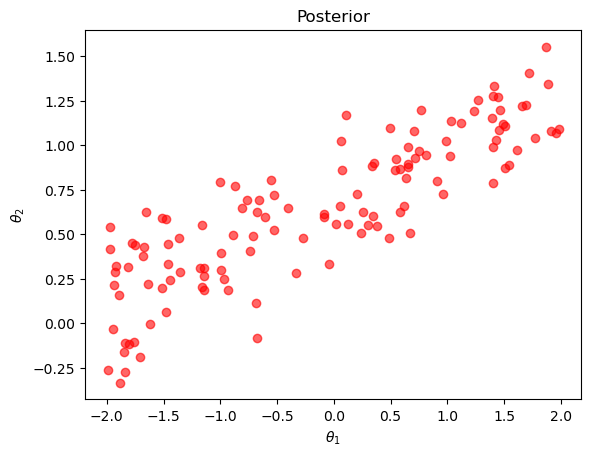

In [5]:
import matplotlib.pyplot as plt

plt.scatter(samples_pos[:, 0], samples_pos[:, 1], alpha = 0.6, color='red')
plt.title('Posterior')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.show()

### Method 1

In [6]:
# Parameters
eps = 0.01 # threshold
obs = 0.3 # y_true
N = 100 # Number of accepted samples
Nsamples = 10_000 # Number of generated samples
dim = 2 # dimension of parameter space
np.random.seed(42)
x = np.random.uniform(-0.5, 0.5, size=(dim,)).astype(np.float32)
print(f"X parameter is: {x}")
np.random.seed(None)
simulator_func=simulator2


samples_pos1 = abc_method1(N, Nsamples, simulator_func, prior, dim, x, obs)
print (f" The number of posterior samples 1 is : {samples_pos1.shape[0]}\n")
print(f"The mean value of posterior 1 is : {samples_pos1.mean(axis=0)}\n")
print(f"The standard deviation of posterior 1 is : {samples_pos1.std(axis=0)}")

samples_pos2 = abc_method2(Nsamples, eps, simulator_func, prior, dim, x, obs, batch_size=100)
print("--"*50)
print(f"The number of posterior samples 2 is : {samples_pos2.shape[0]}\n")
print(f"The mean value of posterior 2 is : {samples_pos2.mean(axis=0)}\n")
print(f"The standard deviation of posterior 2 is : {samples_pos2.std(axis=0)}")

                      

X parameter is: [-0.12545988  0.45071432]
 The number of posterior samples 1 is : 100

The mean value of posterior 1 is : [-0.18454532  0.5941208 ]

The standard deviation of posterior 1 is : [1.132994   0.37847376]
----------------------------------------------------------------------------------------------------
The number of posterior samples 2 is : 138

The mean value of posterior 2 is : [-0.10566248  0.6703577 ]

The standard deviation of posterior 2 is : [1.196218  0.4126859]


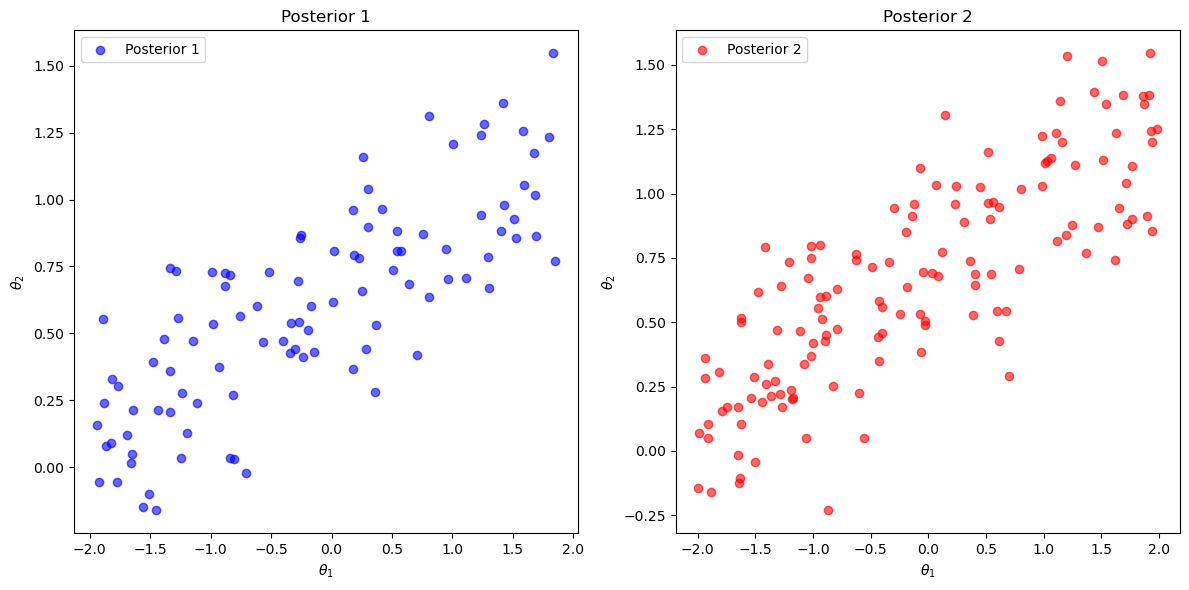

In [7]:
# Plot figures
import matplotlib.pyplot as plt

# Plot figures
fig, axes = plt.subplots(1,2, figsize=(12,6)) 

# Scatter plots for the posteriors from abc_methods
axes[0].scatter(samples_pos1[:,0], samples_pos1[:,1], alpha = 0.6, color='blue', label='Posterior 1')
axes[0].set_title('Posterior 1')
axes[0].set_xlabel(r"$\theta_1$")
axes[0].set_ylabel(r"$\theta_2$")
axes[0].legend()

axes[1].scatter(samples_pos2[:, 0], samples_pos2[:, 1], alpha = 0.6, color='red', label='Posterior 2')
axes[1].set_title('Posterior 2')
axes[1].set_xlabel(r"$\theta_1$")
axes[1].set_ylabel(r"$\theta_2$")
axes[1].legend()

plt.tight_layout()
plt.show()



## OMC

In [2]:
import numpy as np
from simulators import prior, simulator_omc
from models.omc import OMCInference

In [4]:
# Define the dimensions and number of samples
N=10000
theta_dim, u_dim = 5, 5 # Dimensions of theta, # Dimension of nuisance variables

# Observation
y_obs = np.full(theta_dim, 0.3) # Assuming y has the same dimension as simulator output
np.random.seed(42)

# Fixed x from a uniform distribution
x_fixed = np.random.uniform(-1,1, theta_dim)

# Sampling thetas from the prior
theta_pr = prior(N, theta_dim)

# Run Inference 
omc_inference = OMCInference(theta_pr, y_obs, x_fixed, u_dim)
samples_pos, weights = omc_inference.infer()
print(f"The number of samples is: {samples_pos.shape[0]}")

# Calculate weighted mean and std for each dimnensioin of theta
weighted_mean = np.average(samples_pos, weights = weights, axis=0)
weighted_variance = np.average((samples_pos - weighted_mean)**2, weights = weights, axis=0)
weighted_std = np.sqrt(weighted_variance)

print(f"The mean value of the posterior distribution is: {weighted_mean}")
print(f"The standard deviation of the posterior distribution is: {weighted_std}")

The number of samples is: 10000
The mean value of the posterior distribution is: [ 0.00538229 -0.02723251 -0.00138771  0.01190336 -0.01144511]
The standard deviation of the posterior distribution is: [1.15842172 1.15358599 1.15297844 1.15212796 1.15044569]


In [5]:
weights.shape

(10000,)

In [7]:
y_obs

array([0.3, 0.3, 0.3, 0.3, 0.3])

In [9]:
theta_pr.shape

(10000, 5)

In [10]:
non_zero_mask = weights>0
filtered_samples = samples_pos[non_zero_mask]
filtered_weights = weights[non_zero_mask]
print(f"The number of the non-negative samples are: {filtered_samples.shape}")

The number of the non-negative samples are: (10000, 5)
